# Tutorial 2 - Combining Climate and Geospatial data
In this tutorial, you will combine the ERA5 data from Tutorial 1 with geospatial data. Good luck!

NUTS is an abbreviation of "Nomenclature of Territorial Units for Statistics". 
NUTS is a hierarchical classification system for dividing up the economic territory of the European Union and the UK. 

NUTS has three levels to divide geograhic areas:  

    NUTS 1 : 92 major socio-economic regions 
    NUTS 2 : 244 basic regions for the application of regional policies
    NUTS 3 : 1165 small regions for specific diagnosis

    
This classification is used for three purposes: 
1. Collection, development and harmonisation of European regional statistics
2. Socio-economic analyses of the regions
3. Framing of EU regional policies

We will be using the NUTS regions in our exercises for the purpose of harmonizing European regional statistics. 

More information at: https://ec.europa.eu/eurostat/web/nuts/overview

## Download NUTS data

You can download the NUTS data in various formats and scales from:   
https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics  

#### Exercise 1 : 
For the purpose of these exercises, please download NUTS data using:  
- NUTS year: NUTS 2024
- file format: GeoJSON
- Geometry type: polygons (RG) 
- scale: 10M 
- coordinate reference system: EPSG:4326

Please note that the above are NOT the default options on the NUTS webpage.

To keep things tidy, store the GeoJSON file in the "data" directory within the folder of your code.


### GeoJSON
GeoJSON is a data format that is developed to represent simple geographic features.   
It can contain points (e.g. locations, addresses), lines (e.g. infrastructure, boundaries) and polygons (e.g. provinces, countries).   

A GeoJSON polygon has the following structure:

``{``  
``    "type": "Feature",``  
``    "geometry": {``    
``        "type": "Polygon",``  
``        "coordinates": [``  
``            [``  
``                [30.0, 10.0],``  
``                [40.0, 40.0],``  
``                [20.0, 40.0],``  
``                [10.0, 20.0],``  
``                [30.0, 10.0]``  
``            ]``  
``        ]``  
``    },``  
``    "properties": {``  
``        "property1": "value0",``  
``        "property2": { "this": "that" }``   
``    }``  
``}`` 

**Properties**  
Properties can be added to the polygon to add information to the polygon area.   
For instance, the NUTS data contains the properties "NUTS_id" and "NUTS_name" to convey information about which NUTS region the polygon refers to.   
It also contains the property "LEVL_CODE", so as to convey information about the NUTS level the polygon belongs to, i.e. 1, 2 or 3. 

### GeoPandas

When working with data in Python, the Pandas package is a very useful tool that creates DataFrames of tabular (rows/columns) information and makes it easy to analyze and transform that data. 

**GeoPandas** is a Python package that makes it possible to read geographic data into Pandas objects. 
GeoPandas can read GeoJSON files and creates GeoSeries (subclass of pandas.Series) and GeoDataFrames (subclass of pandas.DataFrame). 

GeoPandas makes use of the **shapely** package for geometric operations, **pyogrio** for file access and **matplotlib** for plotting. Make sure to have all these packages installed in your active Anaconda environment (use the command ``pip show <package_name>`` to check for a package that was installed with pip install, or ``conda list <package_name>`` if the package was installed with conda forge). If by some accident any of the above packages are not installed, check the installation instructions on BB how to do this properly.

#### Example 1

Run the following code to import the NUTS data that you have just downloaded.   
Be sure to either store the NUTS GeoJSON file in the "data" directory within the current folder as this Jupyter Notebook, or adjust the code below to point to the directory where you've stored your file. 

In [2]:
import geopandas as gpd
print(gpd. __version__)
df_geo = gpd.read_file('data/NUTS_RG_10M_2024_4326.geojson')
df_geo.head()

1.1.1


,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
0,AT127,3,AT,Wiener Umland/Südteil,Wiener Umland/Südteil,NaN,2.0,NaN,"POLYGON ((15.91663 48.08691, 15.99291 48.14606..."
1,AT130,3,AT,Wien,Wien,NaN,1.0,NaN,"POLYGON ((16.1844 48.17159, 16.21413 48.25183,..."
2,AT211,3,AT,Klagenfurt-Villach,Klagenfurt-Villach,1.0,2.0,NaN,"POLYGON ((13.50425 46.5663, 13.55264 46.59159,..."
3,AT212,3,AT,Oberkärnten,Oberkärnten,1.0,3.0,NaN,"POLYGON ((12.73139 46.63429, 12.69064 46.65697..."
4,AT213,3,AT,Unterkärnten,Unterkärnten,1.0,3.0,NaN,"POLYGON ((13.94663 46.94162, 14.19357 47.06731..."


The column 'geometry' contains the geospatial data of one specific NUTS region. For instance, when you run the code below, it will show the shape of the NUTS-region in the first row:

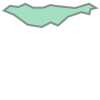

In [3]:
df_geo.loc[0,'geometry']

### Filter GeoDataframes
With GeoPandas, you can use Pandas syntax to filter specific columns or rows. 

#### Example 2
Run the code below to filter only NUTS level 2 data, by filtering on the "LEVL_CODE" column.   
This code visualizes the data by using the "plot()" method. Check the documentation for this function: https://geopandas.org/en/stable/docs/user_guide/mapping.html

<Axes: >

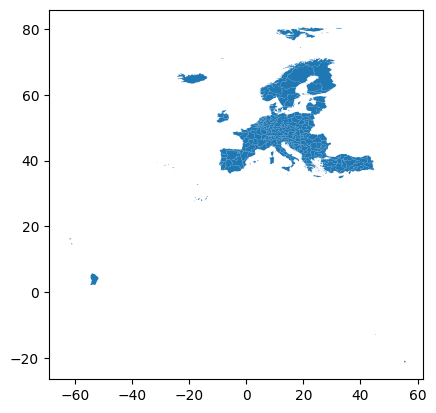

In [4]:
df_geo_nuts2 = df_geo[df_geo['LEVL_CODE'] == 2]
df_geo_nuts2.plot()

_Note_: Standard functions for the Pandas-package (.loc, clipping etc.) can also be applied to geopandas data. 

See: https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values


### Clipping GeoDataframes

"Clipping" geographic data has previously been demonstrated using Xarray in Tutorial 1.  
However, this concept is not unique to xarray and can also be done using GeoPandas.

#### Example 3
Run the code below and use the `clip` method to clip the NUTS level 2 GeoDataframe to the same area (using the same coordinates for Europe) as we've used to download the ERA5 NetCDF data in Tutorial 1 of this course. 

We use the shapely `box` method to achieve this clipping, so you'll need to import it before you can use (as with all Python packages).

Note the difference between the plot produced now and the one in the earlier code cell, where various administrative dependencies of Norway, France. Spain and Portugal which are not in continental Europe were also plotted.

<Axes: >

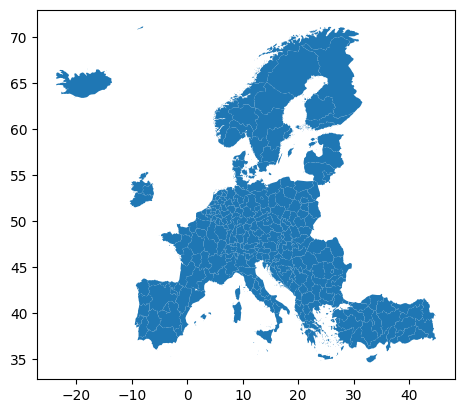

In [5]:
from shapely.geometry import box

north = 71.22
south = 34.31
east = 51.29
west = -23.62

area = box(west, south, east, north)
clipped_nuts2 = df_geo_nuts2.clip(area)

clipped_nuts2.plot()

## Combining Climate and Geospatial data  
In the previous tutorial, we've seen where and how we can download climate data and how we can use this data in analysis. 
We've also seen, in the present tutorial, how we can obtain spatial data regarding regions of the European Union and the United Kingdom. 

In the next section, you are going to combine these 2 types of data in order to perform analyses on climate/weather for separate regions within the EU.

### Rioxarray
We'll be using an xarray package extension called **Rioxarray**, which allows us to clip xarray datasets using raster data (such as GeoDataframes). To do this, you will need to have installed the rioxarray package first, as per instructions on BB during the first tutorial. Check using the command ``conda list rioxarray`` in your active environment, if the package was installed with conda forge, or search for it on the Environments page in your Anaconda Navigator).  

<sub> source: https://corteva.github.io/rioxarray/stable/examples/clip_geom.html

#### Exercise 2: 

Using the same information from before, do the following: 
1. Import the NUTS data dataset into a geoPandas GeoDataframe
2. Select only the data for NUTS 2 regions
3. Clip the NUTS data down to the area of the Netherlands 
4. Filter the dataframe to only contain data from the columns "id" and "geometry" 
5. Plot the resulting GeoDataframe to check that your output is a map of the Netherlands divided into the Dutch provinces.

Note: To plot the data, use the .plot() method that comes with Geopandas.

<Axes: >

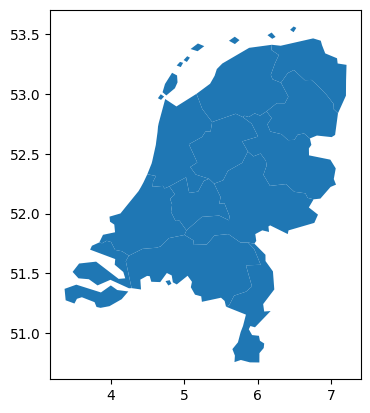

In [6]:
# Insert code for exercise 2 here
# Read the geojson data file
df_geo = gpd.read_file('data/NUTS_RG_10M_2024_4326.geojson')

# Select the NUTS level that you want to analyze
df_geo_nuts2 = df_geo[df_geo['LEVL_CODE'] == 2]

# Clip NUTS data to the Netherlands
nuts2_nl = df_geo_nuts2[df_geo_nuts2["CNTR_CODE"] == "NL"]

# Create a GeoDataframe with only the columns "id" and "geometry"
nuts2_nl_cleaned = nuts2_nl[["NUTS_ID","geometry"]]

# Plot data
nuts2_nl_cleaned.plot()



#### Exercise 3: 
Using the information from the previous tutorial, do the following: 
1. Import the ERA5 dataset downloaded during Tutorial 1 to xarray
2. Use the `era5.rio.write_crs("EPSG:4326", inplace=True)` method to set the Coordinate Reference System (CRS) of the ERA5 dataset to "ESPG:4326". **This is to make sure the coordinates between the two different datasets are aligned.**

In [8]:
# Insert code for exercise 3 here
# Import the ERA5 dataset to xarray
import xarray as xr
era5 = xr.open_dataset('../week4/data/era5/download_new_31110.nc')
# Set the CRS for the ERA5 data equal to that of the NUTS data 
era5.rio.write_crs("EPSG:4326", inplace=True)

<xarray.Dataset> Size: 132MB
Dimensions:      (valid_time: 744, latitude: 148, longitude: 300)
Coordinates:
  * valid_time   (valid_time) datetime64[ns] 6kB 2022-12-01 ... 2022-12-31T23...
  * latitude     (latitude) float64 1kB 71.06 70.81 70.56 ... 34.81 34.56 34.31
  * longitude    (longitude) float64 2kB -23.62 -23.37 -23.12 ... 50.88 51.13
    number       int64 8B ...
    expver       (valid_time) <U4 12kB ...
    spatial_ref  int64 8B 0
Data variables:
    t2m          (valid_time, latitude, longitude) float32 132MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-24T13:27 GRIB to CDM+CF via cfgrib-0.9.1...

#### Exercise 4: Saving smaller, clipped NetCDF datasets into files for later use
1. Create a "for-loop" to loop over the different NUTS 2 regions in your GeoDataframe of the Netherlands, use the "id" column to get the region_id
2. Within the for-loop, create a GeoDataframe for every NUTS 2 region. Make sure this DataFrame contains the "id" and the "geometry" columns. 
  
3. Use the following rioxarray method to clip the ERA5 dataset into separate datasets for each region:  
    `era5.rio.clip(region.geometry.apply(mapping), region.crs, drop=True, all_touched=True)` 
4. Write the ERA5 data for each separate region to a different NetCDF file using the `to_netcdf` method. Note: the file operation takes time, be patient.

In [10]:
#insert your code for exercise 4 here
from shapely.geometry import mapping
import rioxarray as rio


# 1. Loop over the regions in the NUTS 2 dataset: 
for region_id in nuts2_nl["NUTS_ID"]:
    try:
        # 2. Create a GeoDataframe for each separate NUTS region
        region = df_geo_nuts2[df_geo_nuts2["NUTS_ID"] == region_id].copy()

        # 3. For each region, create a clipped xarray dataset
        clipped = era5.rio.clip(region.geometry.apply(mapping), region.crs, drop=True, all_touched=True)

        # 4. Write the regional ERA5 data to NetCDF files
        clipped.to_netcdf(str(f"data/era5_{region_id}.nc"))
    except:
        print(region_id)